In [3]:
# The first step is to import the libraries and data
import numpy as np
import pandas as pd

iris = pd.read_csv("iris_data.csv")

print('Data Overview:')
print(iris.head())

Data Overview:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [4]:
# Pandas automatically give an Index to each row, so we don't need the Id column
# iris = iris.drop('Id',axis=1)
# print(iris.head())

In [5]:
#We can explore the dataset to choose the better way to work with the data
print('Dataset Features:')
print(iris.info())
print()
print('Dataset Summary:')
print(iris.describe())
print()
print('Iris Species Distribution:')
print(iris.groupby('Species').size())

Dataset Features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

Dataset Summary:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000    

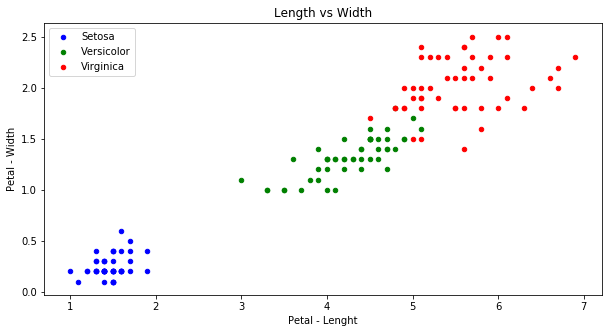

In [7]:
# We can also graph the data to visualize the results using the library Mathplotlib

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

# Select the data we want to add to the graph
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='blue', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='green', label='Versicolor', ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='red', label='Virginica', ax=fig)

# Set the graph labels

fig.set_xlabel('Petal - Lenght')
fig.set_ylabel('Petal - Width')
fig.set_title('Length vs Width')

# Display de graph
plt.show()

In [8]:
# So now we can start applying the different Classification Algorithms 
# to find the more accurate one to classify an Iris flower.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [9]:
# The first step is separating the independent variables from the dependent variable
# and split the training and test data

X = np.array(iris.drop(['Species'], 1))
y = np.array(iris['Species'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
# Now we can use this variables in the differents models to calculate their pecision
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

print('=== MODEL TEST RESULTS ===')
print()

#Logistic Regression
model1 = LogisticRegression()
model1.fit(X_train, y_train)
Y_pred = model1.predict(X_test)
print('Logistic Regression Model Precision: {}'.format(model1.score(X_train, y_train)))
print()

#Support Vector Machine
model = SVC(gamma='scale')
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
print('Support Vector Machine Model Precision: {}'.format(model.score(X_train, y_train)))
print()

#K-Neighbors Classifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
print('K-Neighbors Classifier Model Precision: {}'.format(model.score(X_train, y_train)))
print()

#Decision Tree Classifier
model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)
Y_pred = model2.predict(X_test)
print('Decision Tree Classifier Model Precision: {}'.format(model2.score(X_train, y_train)))
print()

=== MODEL TEST RESULTS ===

Logistic Regression Model Precision: 0.925

Support Vector Machine Model Precision: 0.9916666666666667

K-Neighbors Classifier Model Precision: 1.0

Decision Tree Classifier Model Precision: 1.0

